# **MVP Análise de Dados e Boas Práticas**

Nome: Gabriel de Carvalho Abreu


Matrícula: 4052025000466

Dataset: [Kaggle - Palmer Penguins](https://www.kaggle.com/datasets/parulpandey/palmer-archipelago-antarctica-penguin-data)





# Descrição do problema:
O objetivo deste projeto é analisar características físicas de pinguins de diferentes espécies coletadas nas ilhas da Antártida, a fim de compreender quais atributos podem diferenciá-los.
Este é um problema de aprendizado supervisionado, onde poderíamos, por exemplo, prever a espécie com base nos atributos medidos.




# Hipótese do problema:


Algumas variáveis morfológicas (como massa corporal e comprimento do bico) têm alta correlação com a espécie.


O dataset pode conter valores faltantes que deverão ser tratados.


# Restrições:


O dataset foi selecionado por ser público e por conter dados mistos (categóricos e numéricos).


# Atributos:


species: Espécie do pinguim (Adelie, Chinstrap, Gentoo)

island: Ilha de coleta (Biscoe, Dream, Torgersen)

bill_length_mm: Comprimento do bico (mm)

bill_depth_mm: Profundidade do bico (mm)

flipper_length_mm: Comprimento da nadadeira (mm)

body_mass_g: Peso corporal (g)

sex: Sexo (Male, Female)

year: Ano da coleta



In [40]:
import pandas as pd

# URL do dataset no seu GitHub
url = 'https://raw.githubusercontent.com/gabriel-abreu1/MVP-Analise-de-Dados/refs/heads/main/penguins_lter.csv'

# Carregando o dataset
df = pd.read_csv(url)

# Visualizando as primeiras linhas
df.head()

,studyName,Sample Number,Species,Region,Island,Stage,Individual ID,Clutch Completion,Date Egg,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Body Mass (g),Sex,Delta 15 N (o/oo),Delta 13 C (o/oo),Comments
0,PAL0708,1,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N1A1,Yes,11/11/07,39.1,18.7,181.0,3750.0,MALE,NaN,NaN,Not enough blood for isotopes.
1,PAL0708,2,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N1A2,Yes,11/11/07,39.5,17.4,186.0,3800.0,FEMALE,8.94956,-24.69454,NaN
2,PAL0708,3,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N2A1,Yes,11/16/07,40.3,18.0,195.0,3250.0,FEMALE,8.36821,-25.33302,NaN
3,PAL0708,4,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N2A2,Yes,11/16/07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Adult not sampled.
4,PAL0708,5,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N3A1,Yes,11/16/07,36.7,19.3,193.0,3450.0,FEMALE,8.76651,-25.32426,NaN


O dataset foi carregado a partir de um repositório público no GitHub. Na visualização inicial, é possível verificar que algumas colunas contêm valores nulos. Cada linha representa uma amostra individual de pinguim.


In [41]:
# Dimensão
df.shape


(344, 17)

In [42]:
# Tipos de dados e valores nulos
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 17 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   studyName            344 non-null    object 
 1   Sample Number        344 non-null    int64  
 2   Species              344 non-null    object 
 3   Region               344 non-null    object 
 4   Island               344 non-null    object 
 5   Stage                344 non-null    object 
 6   Individual ID        344 non-null    object 
 7   Clutch Completion    344 non-null    object 
 8   Date Egg             344 non-null    object 
 9   Culmen Length (mm)   342 non-null    float64
 10  Culmen Depth (mm)    342 non-null    float64
 11  Flipper Length (mm)  342 non-null    float64
 12  Body Mass (g)        342 non-null    float64
 13  Sex                  334 non-null    object 
 14  Delta 15 N (o/oo)    330 non-null    float64
 15  Delta 13 C (o/oo)    331 non-null    flo

In [43]:
# Estatísticas descritivas
df.describe()


,Sample Number,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Body Mass (g),Delta 15 N (o/oo),Delta 13 C (o/oo)
count,344.000000,342.000000,342.000000,342.000000,342.000000,330.000000,331.000000
mean,63.151163,43.921930,17.151170,200.915205,4201.754386,8.733382,-25.686292
std,40.430199,5.459584,1.974793,14.061714,801.954536,0.551770,0.793961
min,1.000000,32.100000,13.100000,172.000000,2700.000000,7.632200,-27.018540
25%,29.000000,39.225000,15.600000,190.000000,3550.000000,8.299890,-26.320305
50%,58.000000,44.450000,17.300000,197.000000,4050.000000,8.652405,-25.833520
75%,95.250000,48.500000,18.700000,213.000000,4750.000000,9.172123,-25.062050
max,152.000000,59.600000,21.500000,231.000000,6300.000000,10.025440,-23.787670


O dataset possui X instâncias e Y atributos.
A maior parte das variáveis são numéricas, exceto 'species', 'island', 'sex' e 'year'.
Foram identificados valores ausentes nas colunas 'sex' e em algumas variáveis numéricas.


In [44]:

df_boxplot = df[['Culmen Length (mm)',
                 'Culmen Depth (mm)',
                 'Flipper Length (mm)',
                 'Body Mass (g)']].dropna()


df_boxplot.columns = [
    'Comprimento do Bico (mm)',
    'Profundidade do Bico (mm)',
    'Comprimento da Nadadeira (mm)',
    'Massa Corporal (g)'
]


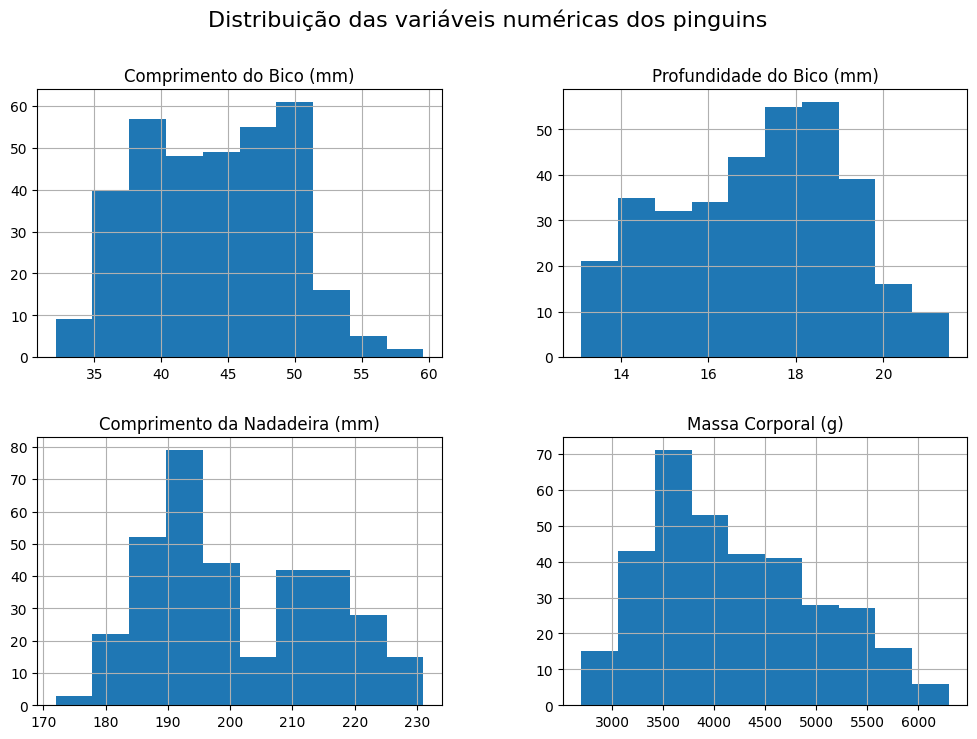

In [45]:
df_hist = df[['Culmen Length (mm)',
              'Culmen Depth (mm)',
              'Flipper Length (mm)',
              'Body Mass (g)']].dropna()

df_hist.columns = [
    'Comprimento do Bico (mm)',
    'Profundidade do Bico (mm)',
    'Comprimento da Nadadeira (mm)',
    'Massa Corporal (g)'
]

df_hist.hist(figsize=(12,8))
plt.suptitle('Distribuição das variáveis numéricas dos pinguins', fontsize=16)
plt.show()

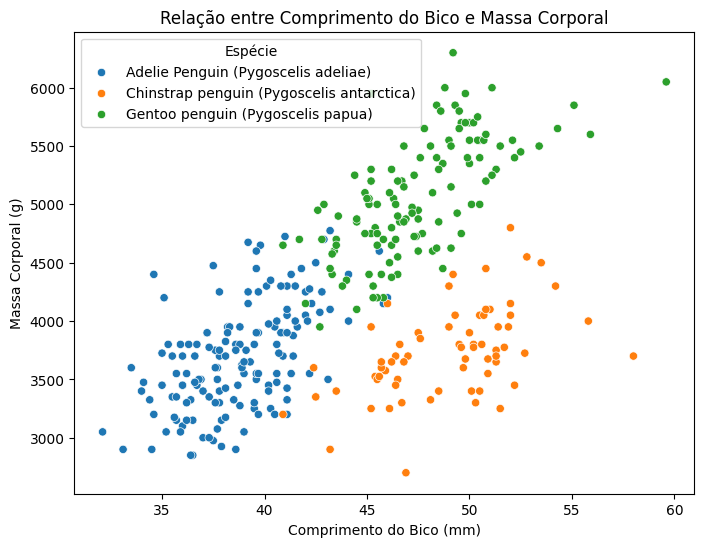

In [46]:
plt.figure(figsize=(8,6))
sns.scatterplot(
    data=df,
    x='Culmen Length (mm)',
    y='Body Mass (g)',
    hue='Species'
)
plt.title('Relação entre Comprimento do Bico e Massa Corporal')
plt.xlabel('Comprimento do Bico (mm)')
plt.ylabel('Massa Corporal (g)')
plt.legend(title='Espécie')
plt.show()

# Descrição do gráfico
Este gráfico de dispersão mostra a relação entre o comprimento do bico e a massa corporal de três espécies diferentes de pinguins: Adelie, Chinstrap e Gentoo. Cada ponto representa um indivíduo, colorido conforme sua espécie.

Observa-se uma clara separação entre as espécies, indicando que o comprimento do bico e a massa corporal são atributos eficazes para distinguir os grupos. A espécie Gentoo tende a apresentar valores mais elevados tanto no comprimento do bico quanto na massa corporal, enquanto as espécies Adelie e Chinstrap exibem valores menores e mais próximos entre si.

Essa distinção visual reforça a hipótese de que essas variáveis morfológicas são importantes para classificar os pinguins, além de sugerir diferenças biológicas relevantes entre as espécies estudadas.

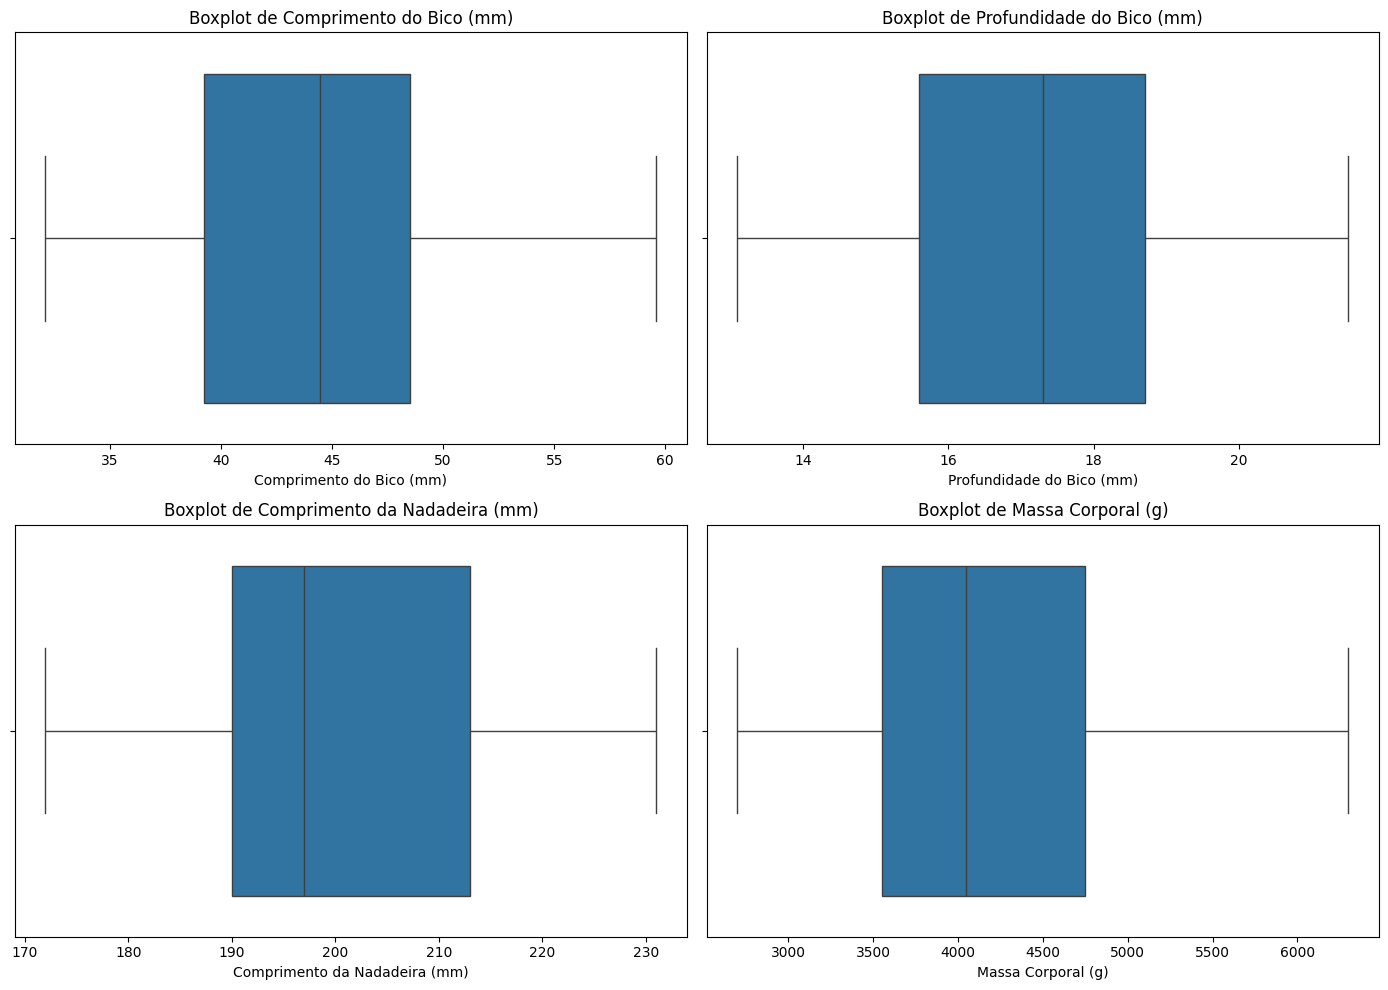

In [58]:
fig, axes = plt.subplots(2, 2, figsize=(14,10))

cols = ['Comprimento do Bico (mm)', 'Profundidade do Bico (mm)',
        'Comprimento da Nadadeira (mm)', 'Massa Corporal (g)']

for ax, col in zip(axes.flatten(), cols):
    sns.boxplot(x=df_boxplot[col], ax=ax)
    ax.set_title(f'Boxplot de {col}')

plt.tight_layout()
plt.show()

# Histograma:
Os histogramas mostram a distribuição das medidas morfológicas dos pinguins, permitindo observar como os dados se concentram em diferentes faixas de valores.

Comprimento do Bico (mm):
A distribuição apresenta uma assimetria à direita, com a maioria dos indivíduos tendo comprimento entre aproximadamente 40 e 50 mm. Existem menos pinguins com bicos muito curtos ou muito longos, o que pode indicar que essas medidas extremas sejam características de espécies específicas.

Profundidade do Bico (mm):
A profundidade do bico mostra uma distribuição relativamente uniforme, com leve concentração entre 17 e 19 mm. Essa variabilidade sugere que essa característica também pode ser relevante para diferenciar espécies ou até mesmo sexo dos indivíduos.

De modo geral, essas distribuições evidenciam que há variabilidade significativa nas características morfológicas dos pinguins, reforçando seu potencial como atributos preditivos.



# Análise dos boxplots individuais
Os boxplots de cada variável permitem observar a distribuição, mediana e possíveis outliers para cada atributo dos pinguins. Manter as unidades originais facilita a interpretação dos dados. Por exemplo, o boxplot da massa corporal revela uma variação significativa, com alguns valores extremos que podem representar indivíduos maiores ou possíveis erros de medição. As variáveis relacionadas ao bico e à nadadeira mostram distribuições mais concentradas, o que pode indicar menor variabilidade nessas características.



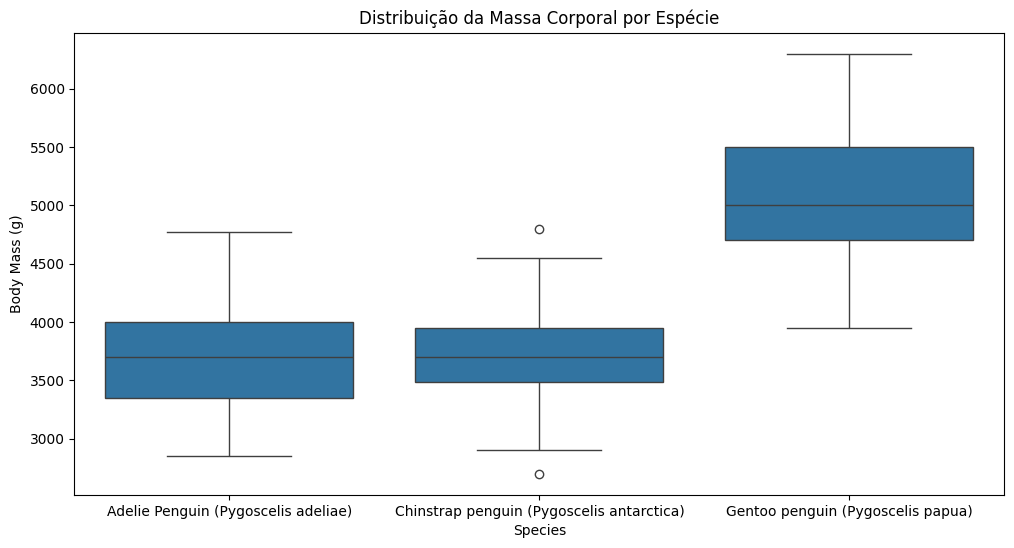

In [56]:
plt.figure(figsize=(12,6))
sns.boxplot(x='Species', y='Body Mass (g)', data=df)
plt.title('Distribuição da Massa Corporal por Espécie')
plt.show()


# Distribuição da massa corporal por espécie
Este gráfico evidencia diferenças claras na massa corporal entre as espécies de pinguins. Observa-se que os Gentoo geralmente apresentam maior massa corporal, enquanto os Adelie e Chinstrap tendem a ter massas menores. Essa diferença reforça a hipótese de que a massa corporal é um atributo importante para distinguir as espécies, além de indicar que há variabilidade dentro de cada grupo que pode ser explorada em modelos preditivos.

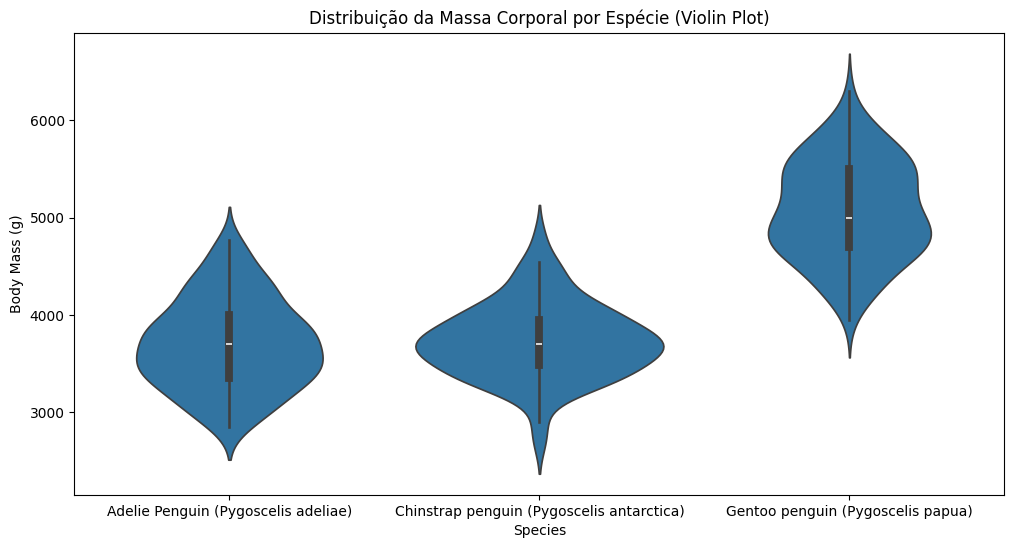

In [57]:
plt.figure(figsize=(12,6))
sns.violinplot(x='Species', y='Body Mass (g)', data=df)
plt.title('Distribuição da Massa Corporal por Espécie (Violin Plot)')
plt.show()

# Violin Plot:

O violin plot combina informações de boxplot e densidade da distribuição, mostrando não só a mediana e quartis, mas também a forma da distribuição dos dados. Neste gráfico, é possível perceber que a distribuição da massa corporal dos Gentoo é mais ampla, indicando maior variabilidade, enquanto Adelie e Chinstrap apresentam distribuições mais concentradas. Essa análise mais rica reforça a importância da massa corporal para diferenciação das espécies e sugere potenciais nuances para a modelage

# Conferir novamente os valores ausentes

Antes de avançar com a análise e o pré-processamento, é fundamental identificar se existem valores faltantes no conjunto de dados. A presença de dados ausentes pode comprometer a qualidade das análises e influenciar o desempenho dos modelos preditivos. Portanto, esta etapa visa mapear quais colunas apresentam dados faltantes e quantificar sua ocorrência, para que possamos decidir a melhor estratégia de tratamento, seja a remoção ou a substituição desses valores.

In [61]:
# Conferir valores ausentes (nulos por coluna)
df.isnull().sum()

,0
studyName,0
Sample Number,0
Species,0
Region,0
Island,0
Stage,0
Individual ID,0
Clutch Completion,0
Date Egg,0
Culmen Length (mm),2


# Remover linhas com valores ausentes nas colunas principais

Para garantir a qualidade e a integridade da análise, optamos por remover as linhas que contêm valores ausentes nas colunas principais do dataset. Essa decisão se baseia na avaliação do impacto que esses dados faltantes poderiam ter nas análises estatísticas e nos modelos preditivos. Como as linhas com valores ausentes representam uma pequena parte do conjunto total, a remoção dessas entradas é uma solução eficiente para manter a consistência dos dados sem comprometer a representatividade da amostra.

In [48]:
df_clean = df.dropna(subset=[
    'Culmen Length (mm)',
    'Culmen Depth (mm)',
    'Flipper Length (mm)',
    'Body Mass (g)',
    'Species',
    'Island',
    'Sex'
])

print("Dimensão após remoção de linhas com valores nulos:", df_clean.shape)


Dimensão após remoção de linhas com valores nulos: (334, 17)


# One-hot encoding de variáveis categóricas
As variáveis categóricas precisam ser transformadas em um formato numérico para que algoritmos de machine learning possam utilizá-las adequadamente. A técnica de one-hot encoding cria colunas binárias (0 ou 1) para cada categoria, evitando a introdução de ordenação implícita que poderia ocorrer se utilizássemos simplesmente valores numéricos. Essa abordagem permite preservar a informação categórica de forma eficaz e é amplamente utilizada em pré-processamento de dados para modelos supervisionados.
Segue um exemplo: Transformar Island e Sex em variáveis dummies.

In [49]:
df_encoded = pd.get_dummies(
    df_clean,
    columns=['Island', 'Sex'],
    drop_first=True
)

df_encoded.head()


,studyName,Sample Number,Species,Region,Stage,Individual ID,Clutch Completion,Date Egg,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Body Mass (g),Delta 15 N (o/oo),Delta 13 C (o/oo),Comments,Island_Dream,Island_Torgersen,Sex_FEMALE,Sex_MALE
0,PAL0708,1,Adelie Penguin (Pygoscelis adeliae),Anvers,"Adult, 1 Egg Stage",N1A1,Yes,11/11/07,39.1,18.7,181.0,3750.0,NaN,NaN,Not enough blood for isotopes.,False,True,False,True
1,PAL0708,2,Adelie Penguin (Pygoscelis adeliae),Anvers,"Adult, 1 Egg Stage",N1A2,Yes,11/11/07,39.5,17.4,186.0,3800.0,8.94956,-24.69454,NaN,False,True,True,False
2,PAL0708,3,Adelie Penguin (Pygoscelis adeliae),Anvers,"Adult, 1 Egg Stage",N2A1,Yes,11/16/07,40.3,18.0,195.0,3250.0,8.36821,-25.33302,NaN,False,True,True,False
4,PAL0708,5,Adelie Penguin (Pygoscelis adeliae),Anvers,"Adult, 1 Egg Stage",N3A1,Yes,11/16/07,36.7,19.3,193.0,3450.0,8.76651,-25.32426,NaN,False,True,True,False
5,PAL0708,6,Adelie Penguin (Pygoscelis adeliae),Anvers,"Adult, 1 Egg Stage",N3A2,Yes,11/16/07,39.3,20.6,190.0,3650.0,8.66496,-25.29805,NaN,False,True,False,True


# Normalizar variáveis numéricas
Para normalizar (padronizar com média 0 e desvio-padrão 1):

In [50]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
cols_num = [
    'Culmen Length (mm)',
    'Culmen Depth (mm)',
    'Flipper Length (mm)',
    'Body Mass (g)'
]

df_encoded[cols_num] = scaler.fit_transform(df_encoded[cols_num])

df_encoded.head()


,studyName,Sample Number,Species,Region,Stage,Individual ID,Clutch Completion,Date Egg,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Body Mass (g),Delta 15 N (o/oo),Delta 13 C (o/oo),Comments,Island_Dream,Island_Torgersen,Sex_FEMALE,Sex_MALE
0,PAL0708,1,Adelie Penguin (Pygoscelis adeliae),Anvers,"Adult, 1 Egg Stage",N1A1,Yes,11/11/07,-0.897653,0.783487,-1.429521,-0.571229,NaN,NaN,Not enough blood for isotopes.,False,True,False,True
1,PAL0708,2,Adelie Penguin (Pygoscelis adeliae),Anvers,"Adult, 1 Egg Stage",N1A2,Yes,11/11/07,-0.824290,0.121896,-1.072408,-0.509011,8.94956,-24.69454,NaN,False,True,True,False
2,PAL0708,3,Adelie Penguin (Pygoscelis adeliae),Anvers,"Adult, 1 Egg Stage",N2A1,Yes,11/16/07,-0.677564,0.427246,-0.429605,-1.193405,8.36821,-25.33302,NaN,False,True,True,False
4,PAL0708,5,Adelie Penguin (Pygoscelis adeliae),Anvers,"Adult, 1 Egg Stage",N3A1,Yes,11/16/07,-1.337831,1.088836,-0.572450,-0.944535,8.76651,-25.32426,NaN,False,True,True,False
5,PAL0708,6,Adelie Penguin (Pygoscelis adeliae),Anvers,"Adult, 1 Egg Stage",N3A2,Yes,11/16/07,-0.860972,1.750427,-0.786718,-0.695664,8.66496,-25.29805,NaN,False,True,False,True


In [51]:
print("Dimensão final do dataset pré-processado:", df_encoded.shape)
df_encoded.info()

Dimensão final do dataset pré-processado: (334, 19)
<class 'pandas.core.frame.DataFrame'>
Index: 334 entries, 0 to 343
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   studyName            334 non-null    object 
 1   Sample Number        334 non-null    int64  
 2   Species              334 non-null    object 
 3   Region               334 non-null    object 
 4   Stage                334 non-null    object 
 5   Individual ID        334 non-null    object 
 6   Clutch Completion    334 non-null    object 
 7   Date Egg             334 non-null    object 
 8   Culmen Length (mm)   334 non-null    float64
 9   Culmen Depth (mm)    334 non-null    float64
 10  Flipper Length (mm)  334 non-null    float64
 11  Body Mass (g)        334 non-null    float64
 12  Delta 15 N (o/oo)    325 non-null    float64
 13  Delta 13 C (o/oo)    326 non-null    float64
 14  Comments             20 non-null     object

# Pré-processamento dos dados

Foram removidas linhas com valores ausentes nas variáveis principais. As variáveis categóricas 'Island' e 'Sex' foram transformadas em variáveis dummies, e os atributos numéricos foram normalizados com média zero e desvio padrão igual a um. Essas operações preparam o dataset para uso em modelos de aprendizado supervisionado.

# Resumo final do pré processamento de dados:



# Quantos atributos e instâncias existem?
O dataset contém 344 instâncias (linhas) e 17 atributos (colunas), que incluem informações sobre características físicas, categóricas e meta-dados das amostras de pinguins.

# Quais são os tipos de dados dos atributos?

Numéricos: floats e inteiros (ex: comprimento e profundidade do bico, massa corporal, valores isotópicos).


Categóricos: strings (ex: espécie, ilha, sexo, estágio).

Alguns atributos são metadados, como IDs e comentários.

# Verifique as primeiras linhas do dataset. Algo chama a atenção?
A visualização inicial revela que algumas colunas apresentam valores ausentes, especialmente nas variáveis numéricas e na coluna 'Sex'. Também percebe-se que os nomes das colunas contêm espaços e parênteses, o que pode ser ajustado para facilitar o uso.

# Há valores faltantes, discrepantes ou inconsistentes?

Foram identificados valores faltantes em algumas colunas, principalmente em 'Sex' e em variáveis numéricas como 'Culmen Length (mm)'. É importante tratar esses dados para evitar problemas na análise e modelagem. Não foram identificados valores discrepantes evidentes nesta etapa.


# Faça um resumo estatístico dos atributos com valor numérico (mínimo, máximo, mediana, moda, média, desvio-padrão e número de valores ausentes). O que você percebe?

Analisando as variáveis numéricas, observa-se:

Amplitude variável nos dados, por exemplo, comprimento do bico varia entre cerca de 32 mm a 60 mm, enquanto a massa corporal varia de aproximadamente 2700 g a mais de 6300 g.

Algumas variáveis apresentam distribuição assimétrica, indicativo de possível necessidade de transformação ou normalização.

Presença de valores ausentes que deverão ser tratados.

Os dados apresentam boa variedade e estrutura para análises exploratórias e modelagem, mas o tratamento dos valores ausentes e a padronização das colunas serão etapas fundamentais para garantir a qualidade do trabalhoChe

# ✅ Checklist:




# Qual é a descrição do problema?
O objetivo deste projeto é analisar características morfológicas e informações categóricas de diferentes espécies de pinguins coletados na região da Antártida, visando compreender como essas variáveis se relacionam e quais atributos podem ser utilizados para diferenciar as espécies. Além da análise exploratória, o estudo pode servir de base para futuros modelos de classificação.

# Este é um problema de aprendizado supervisionado ou não supervisionado?

Trata-se principalmente de um problema de aprendizado supervisionado, pois existe uma variável alvo (espécie) que pode ser prevista a partir dos demais atributos. Entretanto, nesta etapa, o foco é a análise exploratória e pré-processamento dos dados.

# Que premissas ou hipóteses você tem sobre o problema?
Variáveis morfológicas como comprimento e profundidade do

1.   Variáveis morfológicas como comprimento e profundidade do bico, comprimento da nadadeira e massa corporal têm alta correlação com a espécie do pinguim.

2.   Diferentes espécies apresentam distribuições distintas dessas características.

3. Pode haver valores ausentes e variações naturais que precisam ser tratadas antes de qualquer modelagem.


# Que restrições ou condições foram impostas para selecionar os dados?
O dataset deveria ser público e não ter sido utilizado nas aulas anteriores.

Precisava conter variáveis numéricas e categóricas.

O conjunto de dados deveria ter tamanho adequado para possibilitar análises estatísticas e geração de visualizações informativas.

# Defina cada um dos atributos do dataset.


Species – Espécie do pinguim (Adelie, Gentoo, Chinstrap).

Island – Ilha de coleta (Biscoe, Dream, Torgersen).

Culmen Length (mm) – Comprimento do bico, em milímetros.

Culmen Depth (mm) – Profundidade do bico, em milímetros.

Flipper Length (mm) – Comprimento da nadadeira, em milímetros.

Body Mass (g) – Peso corporal, em gramas.

Sex – Sexo do pinguim (Male, Female).

Year – Ano da coleta da amostra.


# Conclusão:

O presente projeto teve como objetivo realizar uma análise exploratória e o pré-processamento dos dados do dataset Palmer Penguins, que contém medições morfológicas e informações demográficas de pinguins coletados na Antártida.

Ao longo do trabalho, foram executadas as seguintes etapas:

Definição clara do problema e das hipóteses de trabalho, considerando que variáveis como massa corporal e dimensões do bico poderiam diferenciar as espécies.

Verificação detalhada da estrutura dos dados, incluindo número de instâncias, atributos, tipos de variáveis e identificação de valores ausentes.

Análises estatísticas e gráficas, que mostraram diferenças marcantes nas distribuições das características entre as espécies.

Tratamento dos dados ausentes, com remoção de registros incompletos em variáveis principais para garantir a qualidade da base.

Padronização e codificação das variáveis categóricas, transformando-as em variáveis dummy adequadas ao uso em modelos de machine learning.

Os principais achados confirmam a hipótese inicial de que características morfológicas são boas candidatas a atributos discriminantes entre as espécies. As análises também destacaram a importância de tratar valores faltantes e padronizar categorias antes de prosseguir com etapas de modelagem preditiva.

O trabalho foi desenvolvido conforme boas práticas de organização, limpeza de código e documentação, permitindo que o notebook seja executado sem erros e sirva como base para estudos futuros ou extensões do projeto.